# Descripción del Proyecto
Somos un analista que trabaja para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. La tarea es encontrar patrones en la información disponible. Necesitamos comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inicialización" data-toc-modified-id="Inicialización-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Inicialización</a></span></li><li><span><a href="#Cargar-los-datos" data-toc-modified-id="Cargar-los-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cargar los datos</a></span></li><li><span><a href="#Revisión-de-los-datos-y-corregimos-de-ser-necesario" data-toc-modified-id="Revisión-de-los-datos-y-corregimos-de-ser-necesario-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Revisión de los datos y corregimos de ser necesario</a></span></li><li><span><a href="#Revisión-de-rangos" data-toc-modified-id="Revisión-de-rangos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Revisión de rangos</a></span></li><li><span><a href="#Enriquecer-datos" data-toc-modified-id="Enriquecer-datos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Enriquecer datos</a></span></li><li><span><a href="#Analisis-de-datos" data-toc-modified-id="Analisis-de-datos-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analisis de datos</a></span><ul class="toc-item"><li><span><a href="#Principales-compañias" data-toc-modified-id="Principales-compañias-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Principales compañias</a></span></li><li><span><a href="#Principales-barrios" data-toc-modified-id="Principales-barrios-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Principales barrios</a></span></li></ul></li><li><span><a href="#Gráficos" data-toc-modified-id="Gráficos-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Gráficos</a></span><ul class="toc-item"><li><span><a href="#Grafico-de-principales-compañias" data-toc-modified-id="Grafico-de-principales-compañias-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Grafico de principales compañias</a></span></li><li><span><a href="#Graficamos-los-principales-barrios" data-toc-modified-id="Graficamos-los-principales-barrios-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Graficamos los principales barrios</a></span></li></ul></li><li><span><a href="#Hipótesis" data-toc-modified-id="Hipótesis-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Hipótesis</a></span><ul class="toc-item"><li><span><a href="#Test-de-Shapiro" data-toc-modified-id="Test-de-Shapiro-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Test de Shapiro</a></span></li><li><span><a href="#Test-de-Levene" data-toc-modified-id="Test-de-Levene-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Test de Levene</a></span></li><li><span><a href="#Verificacion-de-hipotesis" data-toc-modified-id="Verificacion-de-hipotesis-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Verificacion de hipotesis</a></span></li></ul></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

## Inicialización

In [1]:
# Cargamos todas las librerías a usar
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt 
#import math
#import numpy as np #libreria calculos numericos
from scipy import stats as st  #lbreria estadistica

In [2]:
#Definimos una función Print que sea vizualmente mas amigable
def print_mejorado(texto,size):
    size=str(size)
    display(HTML('<span style="font-size: '+size+'px;">'+texto+'</span>'))
    
#Establecemos el número de filas que se pueden ver simulataneamente en 100 (para mejor vizualización)
pd.set_option('display.max_rows', None)  

## Cargar los datos

Cargamos el dataframe que contiene los nombres de la empresas de taxis y el número de viajes de cada compañía de taxis **el 15 y 16 de noviembre de 2017.** Lo nombraremos `company_trips`.

In [3]:
company_trips=pd.read_csv('/datasets/project_sql_result_01.csv')

Cargamos el dataframe que contiene los barrios de Chicago donde finalizaron los viajes y el promedio de viajes que terminaron en cada barrio en **noviembre de 2017.** Lo nombraremos `dropoff_location_avg_trip`.

In [4]:
dropoff_location_avg_trip=pd.read_csv('/datasets/project_sql_result_04.csv')

Cargamos el dataframe que contiene el resultado de la consulta realizada en el punto anterior. Contiene datos sobre la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los días Sabados, ademas de las condiciones climaticas. Lo nombraremos `viajes_loop_to_ohare`.

In [5]:
viajes_loop_to_ohare=pd.read_csv('/datasets/project_sql_result_07.csv')

## Revisión de los datos y corregimos de ser necesario

In [6]:
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
dropoff_location_avg_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
viajes_loop_to_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [9]:
company_trips.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [10]:
dropoff_location_avg_trip.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [11]:
viajes_loop_to_ohare.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


***No se aprecian valores nulos en las tablas. Los tipos de variable son adecuados, solo `start_ts` de la tabla `viajes_loop_to_ohare` debe ser convertido de object a datetime***

In [12]:
#Convertimos start_ts a datetime
viajes_loop_to_ohare['start_ts'] = pd.to_datetime(viajes_loop_to_ohare['start_ts'], format='%Y-%m-%d')

In [13]:
#Verificamos el cambio
viajes_loop_to_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


## Revisión de rangos

In [14]:
#Creamos funcion para visualizar rapidamente histogramas y datos descriptivos de cada columna
def histo_des(df):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    df.hist(ax=ax1,bins=20, figsize=(20,5))
    ax1.set_xlabel('Valores')
    ax1.set_ylabel('Frecuencia')
    ax1.set_title(df.name)
    
    ax2.axis('off')
    ax2.text(0, 0.5, str(df.describe()), fontsize=20, va='center')
    plt.subplots_adjust(wspace=0.5)
    plt.show()

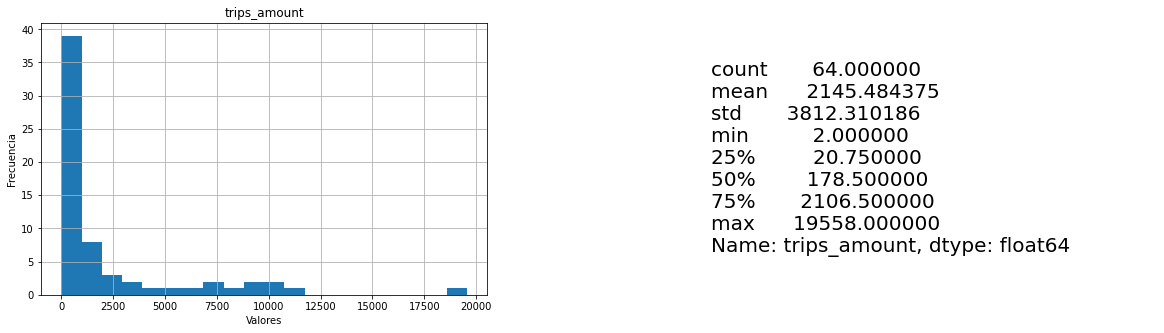

In [15]:
#Revisamos los rangos de la cantidad de viajes por compañia
histo_des(company_trips['trips_amount'])

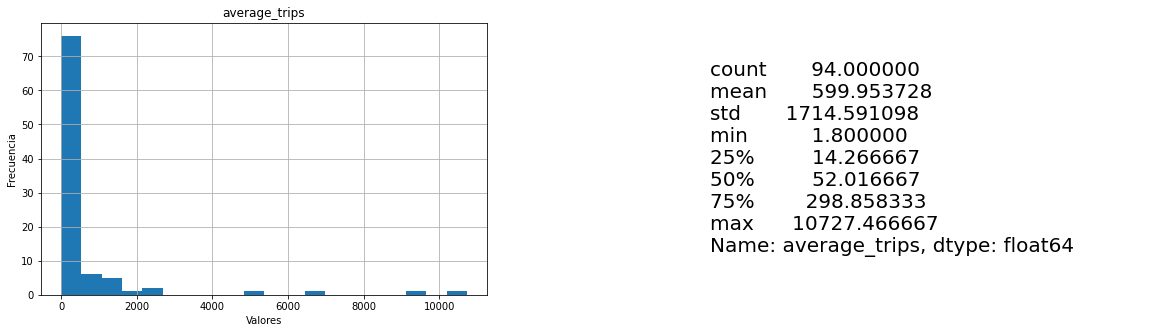

In [16]:
#Revisamos los rangos del promedio de viajes
histo_des(dropoff_location_avg_trip['average_trips'])

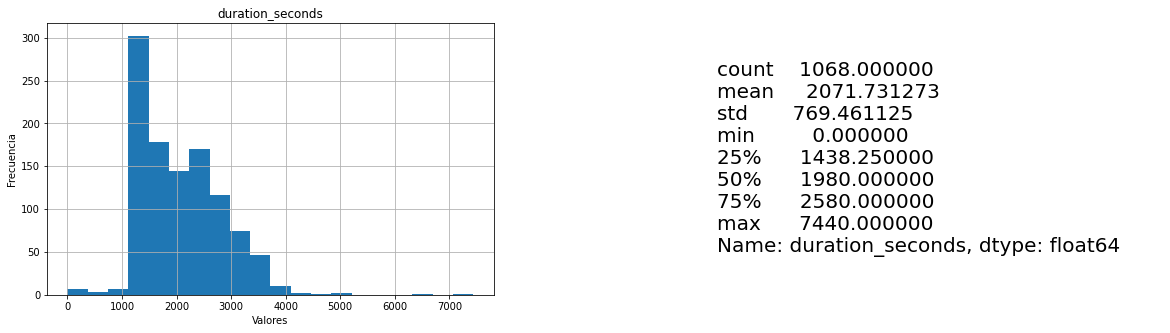

In [17]:
#Revisamos los rangos de la duración de viajes desde loop a o'hare
histo_des(viajes_loop_to_ohare['duration_seconds'])

**No se aprecia ningun valor negativo o excesivamente alto. Los rangos parecen ser corectos.**

## Enriquecer datos

Enriquecemos nuestro Dataframe, agregando columnas que registren el id de mensaje (`id_mensaje`), el dia de la semana (`dia_semana`) y mes (`mes`) en el que se envio el mensaje.

In [18]:
viajes_loop_to_ohare['dia_semana'] = viajes_loop_to_ohare['start_ts'].dt.dayofweek

In [19]:
#Verificamos
viajes_loop_to_ohare.head(10)

,start_ts,weather_conditions,duration_seconds,dia_semana
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
5,2017-11-11 04:00:00,Good,1320.0,5
6,2017-11-04 16:00:00,Bad,2969.0,5
7,2017-11-18 11:00:00,Good,2280.0,5
8,2017-11-11 14:00:00,Good,2460.0,5
9,2017-11-11 12:00:00,Good,2040.0,5


In [20]:
print(viajes_loop_to_ohare['dia_semana'].unique())

[5]


Vemos que la tabla anterior solo contiene información de los viajes efectuados los días sabados (5) del mes de Noviembre de 2017.

## Analisis de datos

### Principales compañias

Ordenamos de mayor a menor las compañias con mayor número de viajes y mostramos las 10 principales

In [21]:
company_trips.sort_values('trips_amount', ascending=False,inplace=True)
company_trips.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


### Principales barrios

Identificamos los 10 principales barrios en términos de finalización del recorrido

In [22]:
dropoff_location_avg_trip.sort_values('average_trips', ascending=False,inplace=True)
dropoff_location_avg_trip.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


## Gráficos

### Grafico de principales compañias

Graficamos de mayor a menor las 10 empresas con mayor número de viajes.

<AxesSubplot:xlabel='company_name'>

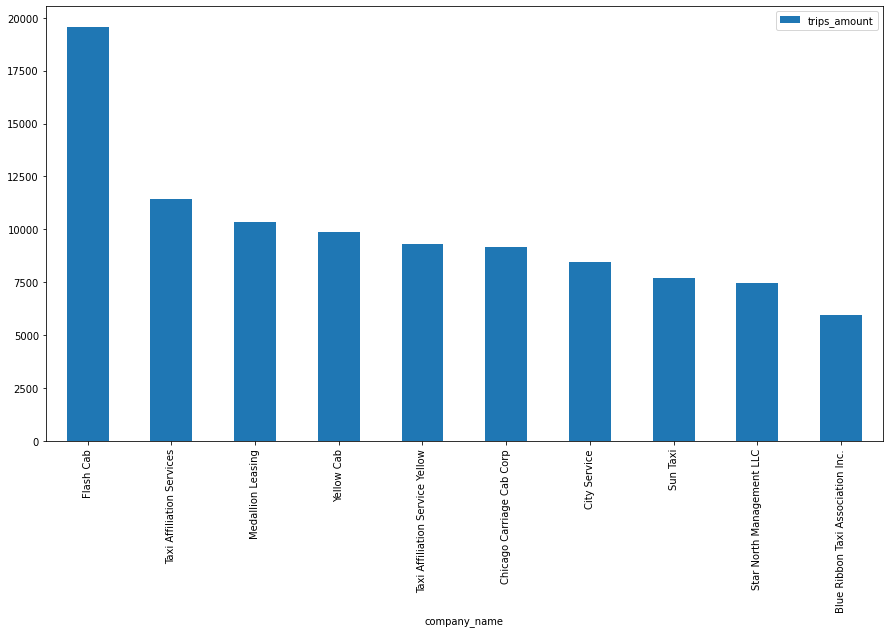

In [23]:
company_trips.head(10).plot(kind="bar",x='company_name', y="trips_amount", figsize=(15,8))

De la gráfica anterior vemos que la empresa mas popular con diferencia es Flash Cab.

### Graficamos los principales barrios

Ahora graficamos de mayor a menor los 10 barrios principales por número promedio de finalizaciones en el mes de noviembre.

<AxesSubplot:xlabel='dropoff_location_name'>

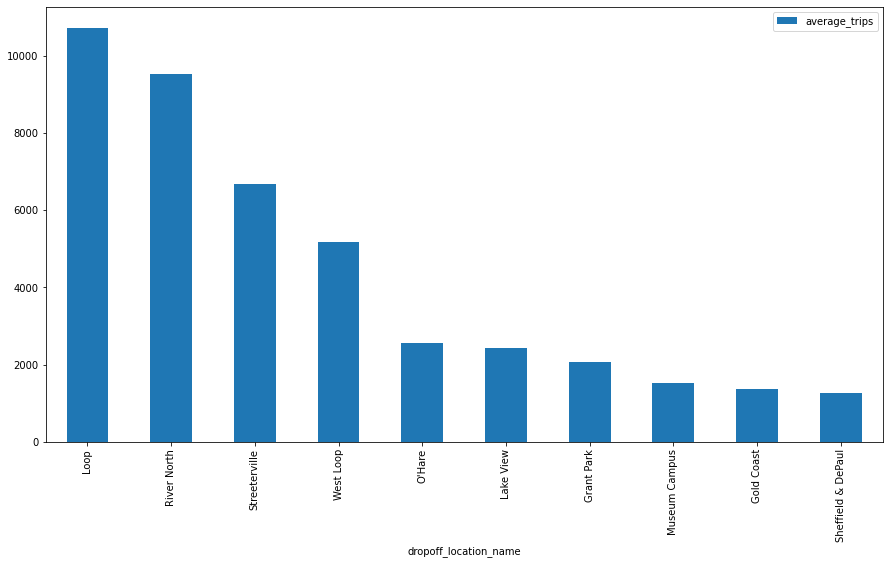

In [24]:
dropoff_location_avg_trip.head(10).plot(kind="bar",x='dropoff_location_name', y="average_trips", figsize=(15,8))

De la gráfica anterior vemos que en el mes de noviembre hubo 4 barrios en donde los viajes terminaron mas frecuentemente. Estos son `Loop`,`River North`,`Streeterville` y`West Loop`.

## Hipótesis

**Hipotesis**  
*\"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos\".*

La tabla `viajes_loop_to_ohare` posee información de la duración de los viajes desde Loop a O'Hare los días sabados del mes de Noviembre. Además registra en `weather_conditions` si al momento de iniciar el viaje estaba lloviendo(Bad) o no(Good).  

Separaré los datos en dos DataFrame, con los registros con lluvia(Bad) y otro con datos sin lluvia(Good) para evaluar la hipotesis. 

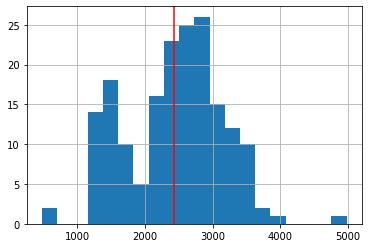

In [25]:
#Dataframe con viajes con lluvia
mean=viajes_loop_to_ohare.query('weather_conditions=="Bad"')['duration_seconds'].mean()
print_mejorado(f"El promedio de duración de viajes en días lluviosos es: {mean:.1f} segundos",20)
bad=viajes_loop_to_ohare.query('weather_conditions=="Bad"')['duration_seconds']
bad.hist(bins=20)
plt.axvline(x=mean, color='r')

La distribución parace no ser una distribución normal.

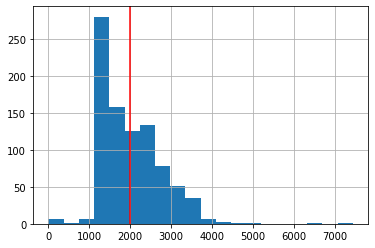

In [26]:
#Dataframe con viajes sin lluvia
mean=viajes_loop_to_ohare.query('weather_conditions=="Good"')['duration_seconds'].mean()
print_mejorado(f"El promedio de duración de viajes en días lluviosos es: {mean:.1f} segundos",20)
good=viajes_loop_to_ohare.query('weather_conditions=="Good"')['duration_seconds']
good.hist(bins=20)
plt.axvline(x=mean, color='r')

La distribución parace no ser una distribución normal.

### Test de Shapiro

Aplicamos el test de Shapiro para evaluar la normalidad de los datos.

In [27]:
stat, p = st.shapiro(bad)
print(f'p={p}')
if p > 0.05: print_mejorado("Las duraciones en dias con lluvia tienen una distribución normal",20)  
else: print_mejorado("Las duraciones en dias con lluvia NO tienen una distribución normal",20)
    
stat, p = st.shapiro(good)
print(f'p={p}')
if p > 0.05: print_mejorado("Las duraciones en dias sin lluvia tienen una distribución normal",20)  
else: print_mejorado("Las duraciones en dias sin lluvia NO tienen una distribución normal",20)

p=0.0036118649877607822


p=1.5529984048014178e-22


### Test de Levene

Aplicamos el test de Levene para evaluar sin las varianzas de nuestras muestras son distintas.

In [28]:
# Test de Levene para verificar si las varianzas son distintas
stat, p = st.levene(bad, good)
print(f'p={p}')

if p > 0.05:
    print_mejorado("Las varianzas son iguales",20)  
else:
    print_mejorado("Las varianzas son diferentes",20)

p=0.5332038671974493


### Verificacion de hipotesis

Para esto verificar la hipotesis, planteamos nuestras hipostesis nula y alterna y verificamos si se cumple la hipotesis nula.  

-La hipotesis nula:  
*La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare ***no*** cambia los sábados lluviosos*  

-La hipotesis alterna:  
*La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos*

Estamos ante la verificación de una **hipótesis sobre la igualdad de las medias de dos poblaciones**, para probar la hipótesis de que las medias de dos poblaciones estadísticas son iguales según las muestras tomadas de ellas, es necesario aplicar el método scipy.stats.ttest_ind.

Para el cálculo de esta hipotesis, usaré un valor de significación (alpha) de un 5%. Es decir, si el valor-p obtenido en el análisis estadístico es menor que 0.05, se considerará que el resultado es estadísticamente significativo y se rechazará la hipótesis nula en favor de la hipótesis alterna.

Procedemos a probar nuestras hipotesis. Dado que el test de Levene arrojó que nuestras varianzas son iguales, en <code>st.ttest_ind</code> usaré el atributo <code>equal_var=True</code>.

In [29]:
#establecemos un nivel crítico de significación estadística (5%)
alpha = 0.05

# Probamos la hipótesis de que La duración promedio de los viajes cambia los sábados lluviosos
#La varianza es igual para ambos grupos
results = st.ttest_ind(bad,good, equal_var=True) 


print('p-value:', results.pvalue) 

if (results.pvalue < alpha): # tu código: compara los valores p obtenidos con el nivel de significación estadística
    print_mejorado("Rechazamos la hipótesis nula",20)
    print_mejorado("La duración promedio de los viajes cambia los dias lluviosos",24)
else:
    print_mejorado("No rechazamos la hipótesis nula",20)
    print_mejorado("La duración promedio de los viajes NO cambia los dias lluviosos",24)

p-value: 6.517970327099473e-12


## Conclusiones

* El mes de noviembre hubo 4 barrios en donde los viajes terminaron mas frecuentemente. Estos fueron `Loop`,`River North`,`Streeterville` y`West Loop`.
* La empresa mas popular con diferencia es Flash Cab.
* La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos